In [411]:
import sympy
import matplotlib.patches as mpatches
import matplotlib.lines as lines
import numpy as np
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy.linalg import inv
from math import log
from random import choices

# 1.3

In [5]:
sympy.init_printing() 
R = sympy.Matrix([[1/4, 1/2], [1/2, 1]])
A = sympy.Matrix([[1, 1],[0, 1]])
R

⎡0.25  0.5⎤
⎢         ⎥
⎣0.5    1 ⎦

In [6]:
A

⎡1  1⎤
⎢    ⎥
⎣0  1⎦

In [7]:
#t=1
Cov1 = R
Cov1

⎡0.25  0.5⎤
⎢         ⎥
⎣0.5    1 ⎦

In [8]:
#t=2
Cov2 = A * Cov1 * A.T + R
Cov2

⎡2.5  2.0⎤
⎢        ⎥
⎣2.0   2 ⎦

In [9]:
#t=3
Cov3 = A * Cov2 * A.T + R
Cov3

⎡8.75  4.5⎤
⎢         ⎥
⎣4.5    3 ⎦

In [10]:
#t=4
Cov4 = A * Cov3 * A.T + R
Cov4

⎡21.0  8.0⎤
⎢         ⎥
⎣8.0    4 ⎦

In [11]:
#t=5
Cov5 = A * Cov4 * A.T + R
Cov5

⎡41.25  12.5⎤
⎢           ⎥
⎣12.5    5  ⎦

# 1.4

<IPython.core.display.Javascript object>


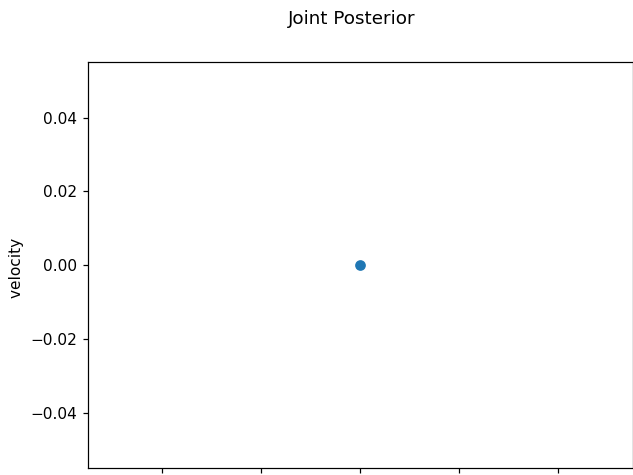

In [12]:
mu_t = sympy.Matrix([0, 0])
plt.scatter(mu_t[0,:],mu_t[1,:])
plt.suptitle('Joint Posterior' )
plt.xlabel('position ')
plt.ylabel('velocity ')
plt.show()
# the joint posterior point for mu will stay at (0,0) unitil the robot can move

In [265]:
def uncertainty_ellipse(eigenvects,t, Cov):
    if eigenvects[0][0] > eigenvects[1][0]:
        ma = 0
        mi = 1
    else:
        ma = 1
        mi = 0
        
    ev_maj = list(eigenvects[ma][2][0])
    ev_min = list(eigenvects[mi][2][0])
    ea_maj = eigenvects[ma][0]
    ea_min = eigenvects[mi][0]
    theta_maj = math.atan(eigenvects[ma][2][0][1]/eigenvects[ma][2][0][0])*180/math.pi
    theta_min = math.atan(eigenvects[mi][2][0][1]/eigenvects[mi][2][0][0])*180/math.pi
    
    plt.close()
    
    # Set plot size
    ax = plt.gca()
    hor_cov = float(Cov.row(0).col(0)[0])
    ver_cov = float(Cov.row(1).col(1)[0])
    scale = 3
    ax.set_xlim(-hor_cov*scale, hor_cov*scale)
    ax.set_ylim(-ver_cov*scale, ver_cov*scale)
    ax.set_aspect('equal', adjustable='datalim')

    ell = mpatches.Ellipse((0,0), math.sqrt(ea_maj*5.992)*2,math.sqrt(ea_min*(-2 * log(1 - 0.68)))*2, theta_maj,fill=False, edgecolor="blue")
    ax.add_patch(ell)

    # Add labels and title
    title = ("Robot Position at Time t = {0}, "
             "95% Covariance Ellipse".format(t))
    plt.title(title)
    plt.xlabel("Position")
    plt.ylabel("Velocity")
    plt.show()
    


In [266]:
#t=0, the graph is empty

<IPython.core.display.Javascript object>


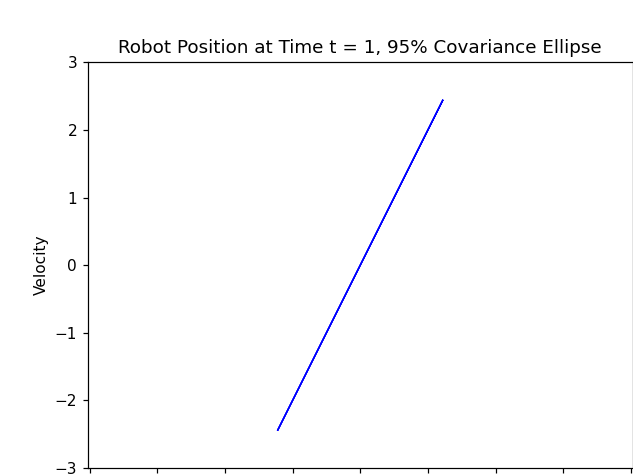

In [267]:
#t=1
eigen1 = Cov1.eigenvects()
ed1 = uncertainty_ellipse(eigen1,1,Cov1)
ed1

<IPython.core.display.Javascript object>


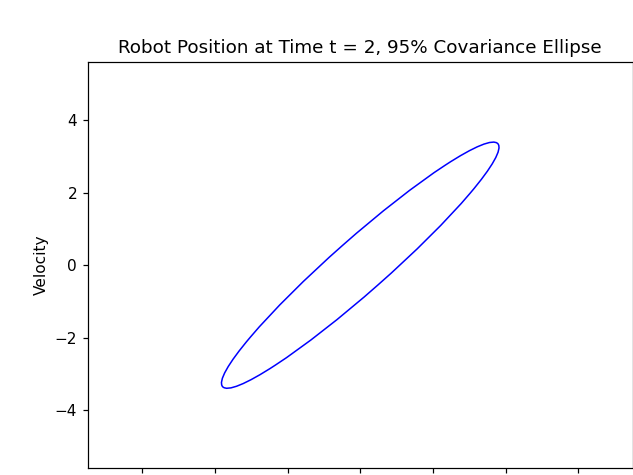

In [268]:
#t=2
eigen2 = Cov2.eigenvects()
ed2 = uncertainty_ellipse(eigen2,2,Cov2)
ed2

<IPython.core.display.Javascript object>


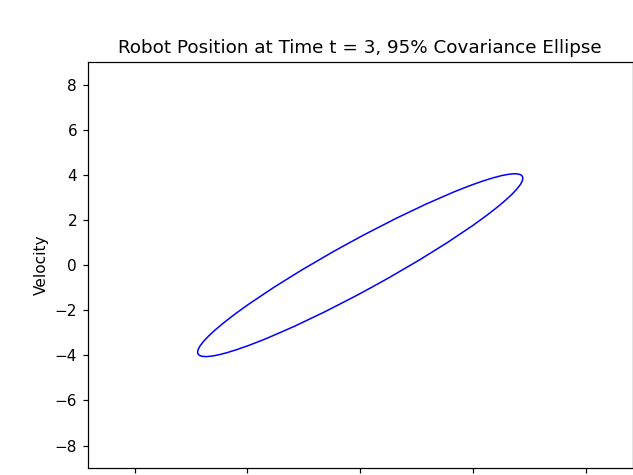

In [269]:
#t=3
eigen3 = Cov3.eigenvects()
ed3 = uncertainty_ellipse(eigen3,3,Cov3)
ed3

<IPython.core.display.Javascript object>


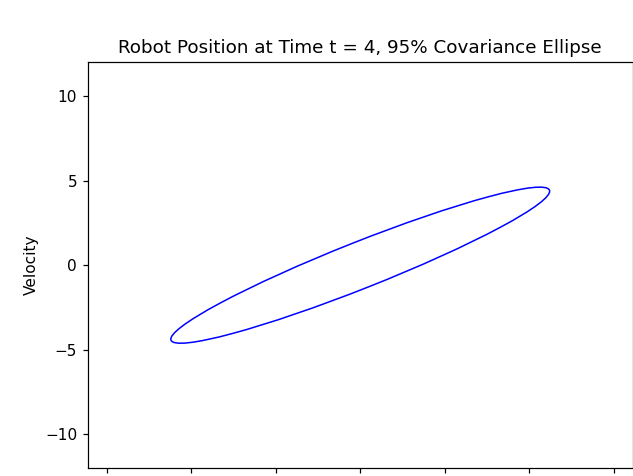

In [270]:
#t=4
eigen4 = Cov4.eigenvects()
ed4 = uncertainty_ellipse(eigen4,4,Cov4)
ed4

<IPython.core.display.Javascript object>


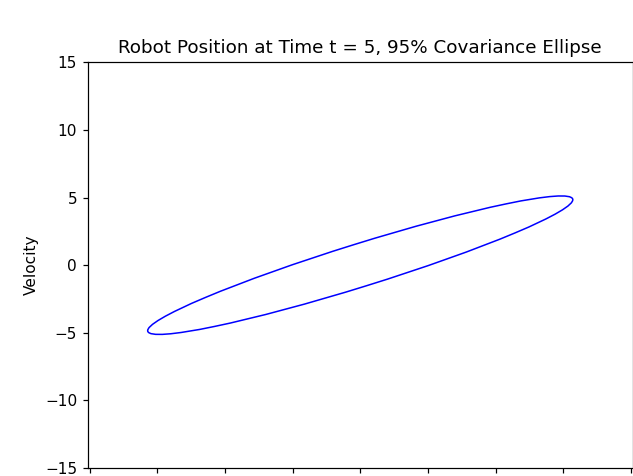

In [271]:
#t=5
eigen5 = Cov5.eigenvects()
ed5 = uncertainty_ellipse(eigen5,5,Cov5)
ed5

# 2.2

In [272]:
C = sympy.Matrix([[1,0]])
Q = sympy.Matrix([8])

In [273]:
K5 = Cov5 * C.T * (C * Cov5 * C.T + Q).inv()
K5

⎡0.83756345177665 ⎤
⎢                 ⎥
⎣0.253807106598985⎦

In [274]:
#C * mu5 = 0
mu5 = sympy.Matrix([0,0])
Zt = 10
Mu5 = mu5 + K5 * (Zt - 0)
Mu5

⎡8.3756345177665 ⎤
⎢                ⎥
⎣2.53807106598985⎦

In [275]:
I = sympy.Matrix([[1,0],[0,1]])
COV5 = (I - K5 * C) * Cov5
COV5

⎡6.7005076142132   2.03045685279188⎤
⎢                                  ⎥
⎣2.03045685279188  1.82741116751269⎦

# 2.3

In [281]:
R = sympy.Matrix([[1/4, 1/2], [1/2, 1]])
A = sympy.Matrix([[1, 1],[0, 1]])
C = sympy.Matrix([[1,0]])
Q = sympy.Matrix([8])
B = sympy.Matrix([[0, 0],[0, 0]])
U = sympy.Matrix([0,0])
I = sympy.Matrix([[1,0],[0,1]])

# if the measuerement doesnt fail 
# we need to get expect_E = A*pre_E*A.T+R       

# if fail
# K = Cov * C.T * (C * Cov * C.T + Q).inv()
# expect_E = (I - K5 * C) * pre_E

In [412]:
E = np.zeros((16,2,2))
E[1] = Cov4 # we use E at t=4 as previous one

When p equals:
0.1
average_Error:
-0.00211159481634100
the expect error of the 100th iteration at t=20:
0
-------------------
When p equals:
0.5
average_Error:
-0.265147220257237
the expect error of the 100th iteration at t=20:
0
-------------------
When p equals:
0.9
average_Error:
-0.942252293632172
the expect error of the 100th iteration at t=20:
-1.08924470847296
-------------------


<IPython.core.display.Javascript object>


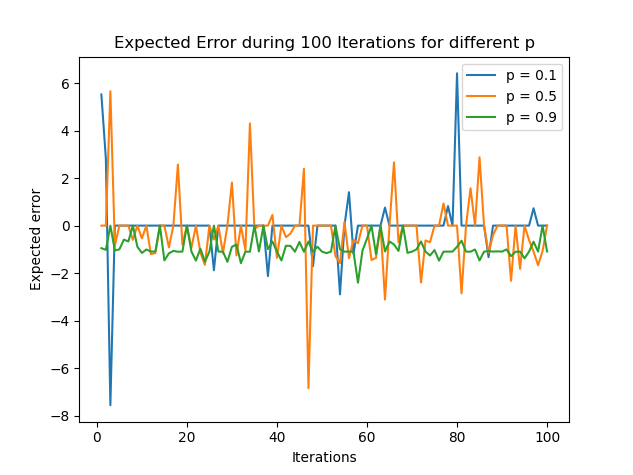

In [439]:
# generate 16 RANDOM fake measurements based on varaiance
z = np.zeros((16 , ))
z[0] = 10
z[1:] = np.random.normal(0, np.sqrt(8), 15)
    
for p in [.1,.5,.9]:
    t = 16 # we starts at t=5
    mu = pre_mu = sympy.Matrix([0,0])
    
    pre_E = Cov4 # we use E at t=4 as the previous one 
    E = Cov5     
    
    population = [1, 0] # we set probability 
    weights = [p,1-p]
    
    expect_E = []
    average_E = 0
    for i in range(100):
        for T in range(t):
            #print(T)
            pre_mu = A * mu 
            pre_E = A * E *A.T + R
            if choices(population, weights) == [1]:
                #Fail
                K = E * C.T * (C * E * C.T + Q).inv()
                mu = pre_mu + K * (sympy.Matrix([z[T]]) - C * pre_mu)
                E = (I - K * C) * pre_E   
                #print("-")
                

            else:
                # Doesn't fail
                E = pre_E
                mu = pre_mu  
                #print("+")
        #print(mu)
        #print(mu[0,-1])
        expect_E.append(mu[0,-1] - pre_mu[0,-1])
        average_E = np.mean(expect_E)  
    print("When p equals:")
    print(p)
    print("average_Error:")
    print(average_E)
    print("the expect error of the 100th iteration at t=20:")
    print(expect_E[-1])
    print("-------------------")
    plt.plot(range(1,101),expect_E, label = 'p = %s' % str(p))
plt.xlabel('Iterations')
plt.ylabel('Expected error')
plt.title('Expected Error during 100 Iterations for different p')
plt.legend()
plt.show()   
                
            


# 3.1

In [283]:
b = sympy.Matrix([[4.5, 0],[0,0]])
u = sympy.Matrix([1,0])
x = pre_x = sympy.Matrix([0,0]) 
a = sympy.Matrix([np.random.normal(1, 0.01, 1)])  # add wind effect influencing the acceleration
e = sympy.Matrix([1/2,1])

In [287]:
def go_next(preX):
    
    X = A * preX + b * u + e * a
    
    return X

In [288]:
# t=1
x_1 = go_next(pre_x)
x_1

⎡5.00942374863472⎤
⎢                ⎥
⎣1.01884749726945⎦

In [289]:
# t=2
x_2 = go_next(x_1)
x_2

⎡11.0376949945389⎤
⎢                ⎥
⎣2.0376949945389 ⎦

In [290]:
# t=3
x_3 = go_next(x_2)
x_3

⎡18.0848137377125⎤
⎢                ⎥
⎣3.05654249180835⎦

In [291]:
# t=4
x_4 = go_next(x_3)
x_4

⎡26.1507799781556⎤
⎢                ⎥
⎣4.07538998907779⎦

In [292]:
# t=5
x_5 = go_next(x_4)
x_5

⎡35.2355937158681⎤
⎢                ⎥
⎣5.09423748634724⎦

<IPython.core.display.Javascript object>


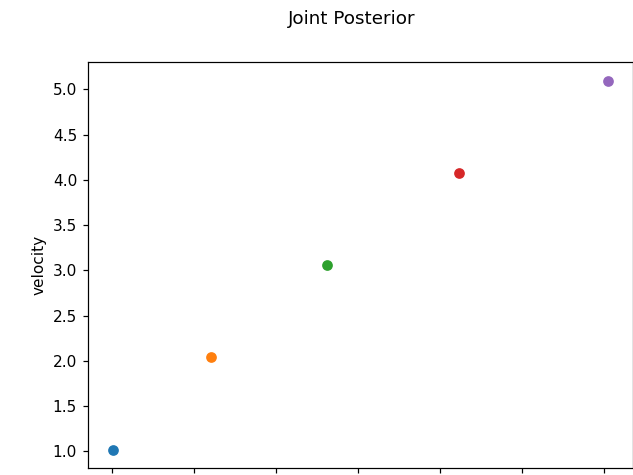

In [295]:
plt.scatter(x_1[0,:],x_1[1,:])
plt.scatter(x_2[0,:],x_2[1,:])
plt.scatter(x_3[0,:],x_3[1,:])
plt.scatter(x_4[0,:],x_4[1,:])
plt.scatter(x_5[0,:],x_5[1,:])
plt.suptitle('Joint Posterior' )
plt.xlabel('position')
plt.ylabel('velocity')
plt.show()